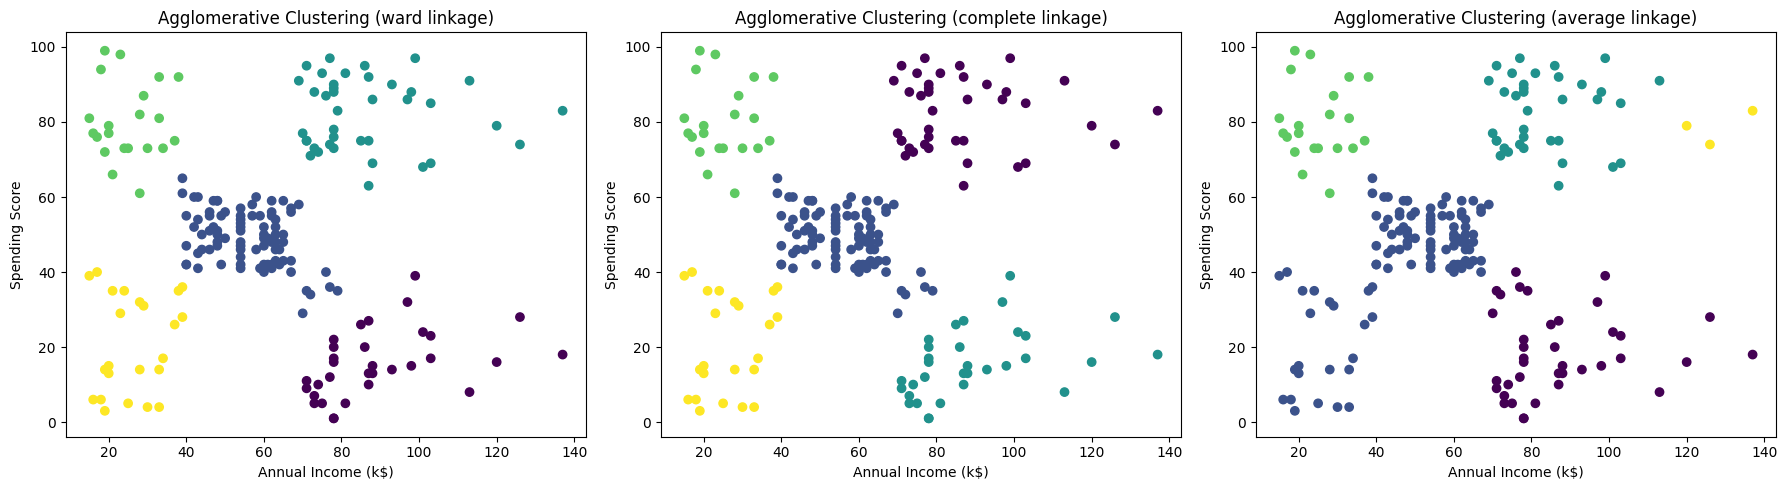

In [1]:
# Import required libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering

# Load dataset
data = pd.read_csv('shopping-data.csv')

# Extract relevant features
X = data[['Annual Income (k$)', 'Spending Score (1-100)']]

# List of linkage methods
linkages = ['ward', 'complete', 'average']

# Plot clusters for each linkage
plt.figure(figsize=(18,5))
for i, link in enumerate(linkages):
    clustering = AgglomerativeClustering(n_clusters=5, linkage=link)  # assuming 5 clusters
    labels = clustering.fit_predict(X)
    
    plt.subplot(1,3,i+1)
    plt.scatter(X['Annual Income (k$)'], X['Spending Score (1-100)'], c=labels, cmap='viridis')
    plt.title(f'Agglomerative Clustering ({link} linkage)')
    plt.xlabel('Annual Income (k$)')
    plt.ylabel('Spending Score')

plt.tight_layout()
plt.show()


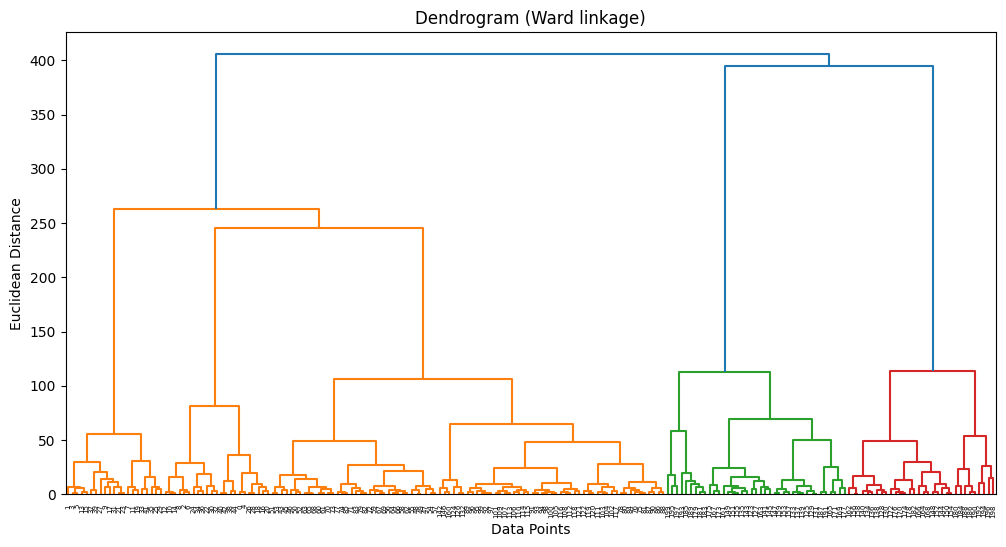

In [2]:
from scipy.cluster.hierarchy import dendrogram, linkage

# Perform hierarchical clustering
Z = linkage(X, method='ward')

# Plot dendrogram
plt.figure(figsize=(12,6))
dendrogram(Z, truncate_mode='level', p=20)  # truncate for clarity
plt.title('Dendrogram (Ward linkage)')
plt.xlabel('Data Points')
plt.ylabel('Euclidean Distance')
plt.show()


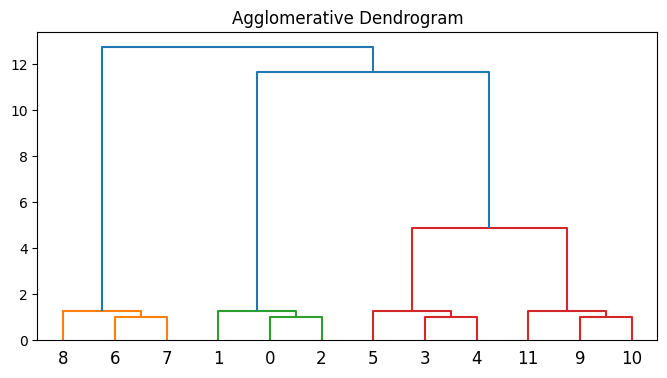

In [3]:
import numpy as np

# Small dataset
X_small = np.array([[1,2], [2,1], [1,1], [5,5], [6,5], [5,6], [8,1], [9,1], [8,2], [3,7], [4,7], [3,8]])
# Agglomerative clustering dendrogram
Z_agg = linkage(X_small, method='ward')
plt.figure(figsize=(8,4))
dendrogram(Z_agg)
plt.title('Agglomerative Dendrogram')
plt.show()


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

# Load the dataset
df = pd.read_csv('shopping-data.csv')  # Make sure the file is in same folder
X = df[['Annual Income (k$)', 'Spending Score (1-100)']].values

# Create a figure with subplots
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

# List of linkage methods to try
linkage_methods = ['ward', 'complete', 'average']
titles = ['Ward Linkage', 'Complete Linkage', 'Average Linkage']

for i, (method, title) in enumerate(zip(linkage_methods, titles)):
    # Perform clustering
    clustering = AgglomerativeClustering(n_clusters=5, linkage=method)
    labels = clustering.fit_predict(X)
    
    # Plot clusters
    ax = axes[i]
    scatter = ax.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=50)
    ax.set_title(title)
    ax.set_xlabel('Annual Income (k$)')
    if i == 0:
        ax.set_ylabel('Spending Score')

plt.tight_layout()
plt.show()